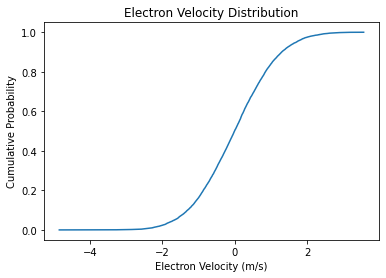

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample electron velocity data
velocities = np.random.normal(loc=0, scale=1, size=10000)

# Calculate the empirical CDF
x = np.sort(velocities)
y = np.arange(1, len(velocities)+1) / len(velocities)

# Plot the CDF
plt.plot(x, y)
plt.xlabel('Electron Velocity (m/s)')
plt.ylabel('Cumulative Probability')
plt.title('Electron Velocity Distribution')
plt.show()

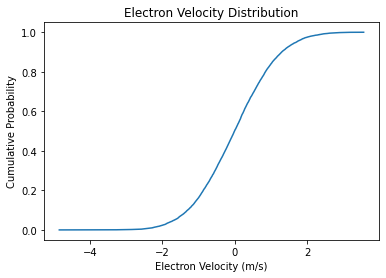

In [3]:
plt.plot(x, y)
plt.xlabel('Electron Velocity (m/s)')
plt.ylabel('Cumulative Probability')
plt.title('Electron Velocity Distribution')
plt.show()

In [2]:
import spacepy.pycdf as pycdf
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Read data from CDF file
cdf_file = pycdf.CDF('wi_elpd_3dp_20230328_v02.cdf')
energy = cdf_file['ENERGY'][...]
pitch_angle = cdf_file['PANGLE'][...]
flux = cdf_file['FLUX'][...]
cdf_file.close()


# Define the grid
energy_grid = np.linspace(0, 30, 120)
pitch_angle_grid = np.linspace(0, 180, 15)
energy_grid, pitch_angle_grid = np.meshgrid(energy_grid, pitch_angle_grid)

# Interpolate the flux values onto the grid
flux_interp = griddata((pitch_angle.flatten(), energy.flatten()), flux.flatten(),
                       (energy_grid, pitch_angle_grid), method='linear')

# Plot the 2D histogram
fig, ax = plt.subplots()
im = ax.imshow(flux_interp.T, extent=[0, 180, 0, 30], origin='lower',
               aspect='auto', cmap='inferno')
ax.set_xlabel('Pitch Angle (deg)')
ax.set_ylabel('Energy (keV)')
cbar = fig.colorbar(im)
cbar.set_label('Flux')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6856,) and arg 1 with shape (12855,).